# Principal Component Analysis (PCA)👨🏼‍🏫

**Principal Component Analysis** is a dimensionality-reduction method that is often used to reduce the dimensionality of large dataset. The idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible. Following the application of this method, we have several benefits
- we can rank the observations based on several variables
- overcome multi-collinearity
- data visualization (biplot)

This method is based on the following steps:
<ol>
<li>Standardize the range of continuous initial variables</li>
<li>Compute the covariance matrix to identify correlations</li>
<li>Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components</li>
<li>Create a feature vector to decide which principal components to keep</li>
<li>Recast the data along the principal components axes</li>
</ol>

We will apply Principal Component Analysis for breast cancer Wisconsin (original) [dataset](https://www.kaggle.com/datasets/marshuu/breast-cancer). The dataset contains 699 real observations considering 9 independent variables that allow us to classify the dependent variable as malignant or benign. A brief description of the medical terminology can be consulted in this [notebook](https://github.com/MihaiTudor26/Logistic_Regression_Tutorial).

**✏️Import libraries.**

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

**✏️Import dataset.**

In [106]:
df= pd.read_csv('breast_cancer.csv') #read the dataset

- View summary of dataset.

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [108]:
df.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


- We will replace the value 2 with 0 and the value 4 with 1 in the class column. The value 1 will indicate malignant cancer and 0 will indicate benign cancer.

In [109]:
df=df.replace({'Class':{4:1, 2:0}})

In [110]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


- Declare feature vector and target variable.

In [111]:
target= df['Class'] #target variable
df= df.drop(['Class'], axis=1)#feature vector

In [112]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


**✏️Standardize the range of continuous initial variables.**

The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

In [113]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

**✏️Select the number of components for PCA.**

Text(0, 0.5, 'Cumulative explained variance')

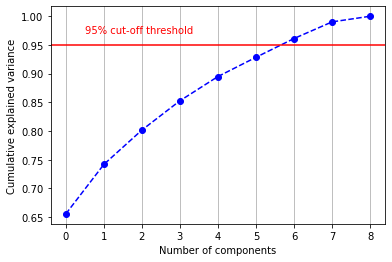

In [114]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.grid(axis='x')
plt.text(0.5, 0.97,'95% cut-off threshold', color = 'red')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

We note that 95% of variance is observed by 6 components.

**❗️ Observations:**
- The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables.
- Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. 
- Geometrically speaking, principal components represent the directions in the data that explain the maximum amount of variance, that is, the lines that capture the most information in the data. The relationship between variance and information is that the greater the variance carried by a line, the greater the dispersion of data points along it, and the greater the dispersion along a line, the more has more information. Principal components can be viewed as new axes that provide the best angle to view and evaluate the data so that differences between observations are more visible.
- Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data.
- The eigenvectors and eigenvalues come in pairs and have the following meaning:
   - the eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance (most   information) 
   - eigenvalues are the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.
   - By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.
- The feature vector is a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction, because if we choose to keep only p eigenvectors (components) out of n, the final data set will have only p dimensions. This step basically reduces the size of the original database.
- Recast the data along the principal components axes:
 $$FinalDataSet=FeatureVector^{T}*StandardizedOriginalDataSet^{T}$$

**✏️Scree plot and Variance Explained.**

A scree plot displays how much variation each principal component in the data captures and allows us to select principal components to keep in the entire data set. If the first two or three PCs have captured most of the information, then we can ignore the rest without missing anything important. The y-axis is represented by the eigenvalues, which essentially indicate the amount of variation.

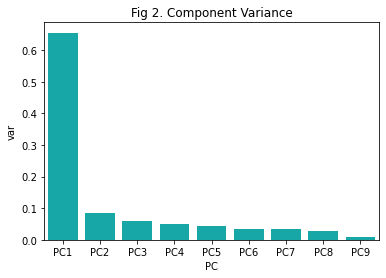

In [115]:
import seaborn as sn
dfScree = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})
sn.barplot(x='PC',y="var",data=dfScree, color="c").set_title('Fig 2. Component Variance');

**✏️Compute the correlations between the original data and each principal component.**

In our analysis, we will keep only the first two components that capture around 75% of the variance.

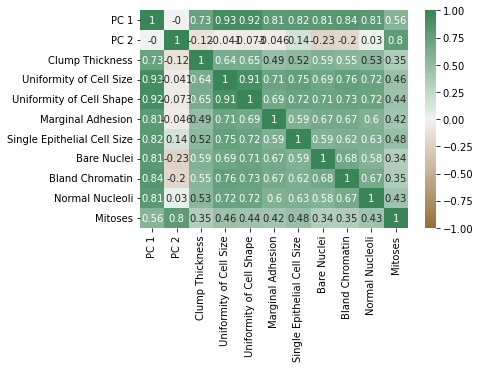

In [116]:
pca = PCA(n_components=2)
PC_scores = pd.DataFrame(pca.fit_transform(df_scaled),
               columns = ['PC 1', 'PC 2'])
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled = df_scaled.round(2)
df_corr = pd.concat([PC_scores,df_scaled], axis=1)
matrix_corr=round(df_corr.corr(),3)
heatmap = sns.heatmap(
matrix_corr,
vmin=-1, vmax=1,annot=True, center=0,
cmap=sns.diverging_palette(50, 500, n=500),

)
plt.show()

- PCA 1- The first principal component is strongly correlated with eight of the original variables. 
- PCA 2- The second principal component is strongly correlated only Mitoses.

**✏️Biplot Analysis.**

Terminology: The results of a PCA are usually discussed in terms of component scores, sometimes called factor scores (the transformed variable values corresponding to a particular data point), and loadings (the weight by which each standardized original variable should be multiplied to get the component score).

Biplot Analysis is an exploratory graph method used in statistic with two-dimensional chart that represents of multidimensional dataset.

Representation of angle degrees between two variables :
- 90 degree, there is no correlation between two variable
- less than 90 degree, there is positive correlation between two variable
- more than 90 degree, there is negative correlation between two variable

Representation of vector line length :
- vector line length represent the variance level of variable
- the longer the vector line, the greater the variance
- the shorter the line, the less the variance.

Representation of the observed and the variable:
- the smaller the observation distance and the direction of the variable, the higher the value of the variable for that observation
- the greater the distance between the observation and the direction of the variable, the lower the value of the variable for that observation


In [117]:
PC1 = pca.fit_transform(df_scaled)[:,0]
PC2 = pca.fit_transform(df_scaled)[:,1]
ldngs = pca.components_#loadings
pca.components_

array([[ 0.30186683,  0.38071344,  0.37719005,  0.33276018,  0.33724538,
         0.33484691,  0.34577721,  0.33526409,  0.23045873],
       [-0.14051583, -0.046825  , -0.08274512, -0.05346763,  0.16565699,
        -0.26085565, -0.22873072,  0.03340226,  0.90522694]])

In [118]:
scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']


In [119]:
target_groups = np.digitize(target, 
                            np.quantile(target, 
                                        [1/3, 2/3]))

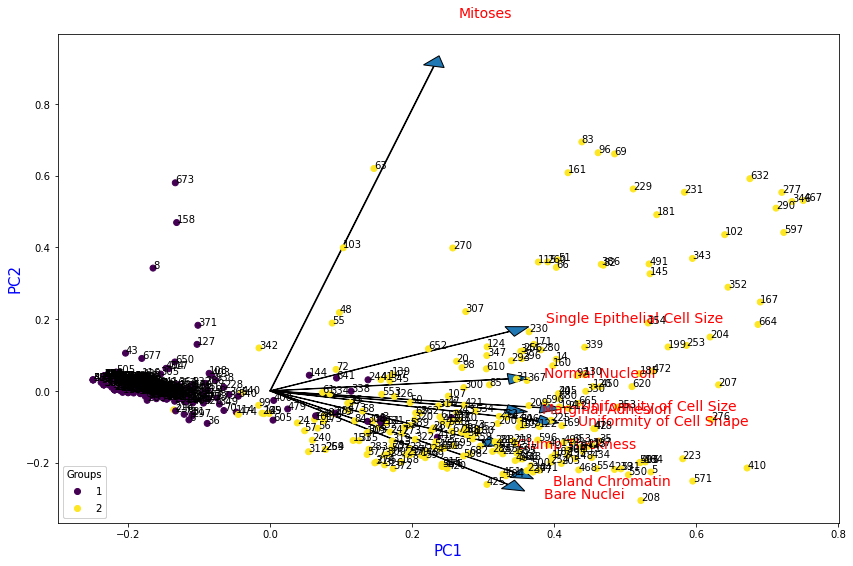

In [120]:
fig, ax = plt.subplots(figsize=(14, 9))
 
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i], 
             head_width=0.03, 
             head_length=0.03)
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize = 14,color="red")
    
scatter = ax.scatter(PC1 * scalePC1, 
                     PC2 * scalePC2, 
                     c=target_groups, 
                     cmap='viridis')
 
ax.set_xlabel('PC1', fontsize=15,color="blue")
ax.set_ylabel('PC2', fontsize=15,color="blue")
for i, label in enumerate(PC_scores.index):
    ax.text(PC1[i] * scalePC1, 
            PC2[i] * scalePC2, str(label), 
            fontsize=10)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", 
                    title="Groups")
ax.add_artist(legend1)

**❗️Observations:**
- The left and bottom axes are of the PCA plot. It shows PCA scores of the samples (dots).
- The top and right axes belong to the loading plot. It shows how strongly each characteristic (vector) influence the principal components.

**✏️Biplot Analysis Interpretation.**

- The vector length of all variables is relatively the same, only the Mitoses variable have a longest line
- Mitoses variable has the largest variance of values compared to other variables.
- 'Uniformity of Cell Shape' and 'Single Epithelial Cell Size' variables have a strong positive correlation because they have very small degree between two lines. The same can be said about 'Bare Nuclei' and 'Bland Chromatin' variables.
- Bare Nuclei and Mitosis variables have a weak positive correlation because the degree between two lines is close to 90
- 'Uniformity of Cell Shape' and 'Single Epithelial Cell Size' have large positive loadings on component 1
- Mitoses have large positive loadings on component 2.

**📚References.**

- Steven M. Holland, Univ. of Georgia: Principal Components Analysis
- skymind.ai: Eigenvectors, Eigenvalues, PCA, Covariance and Entropy
- Lindsay I. Smith: A tutorial on Principal Component Analysis